# Carga del dataset "Pima Indians Diabetes Database"

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [22]:
data = pd.read_csv('diabetes.csv')
print("data head")
print(data.head())
print("data describe")
print(data.describe())
print(data)

X = data[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]].values

y = data['Outcome']

data head
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
data describe
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      

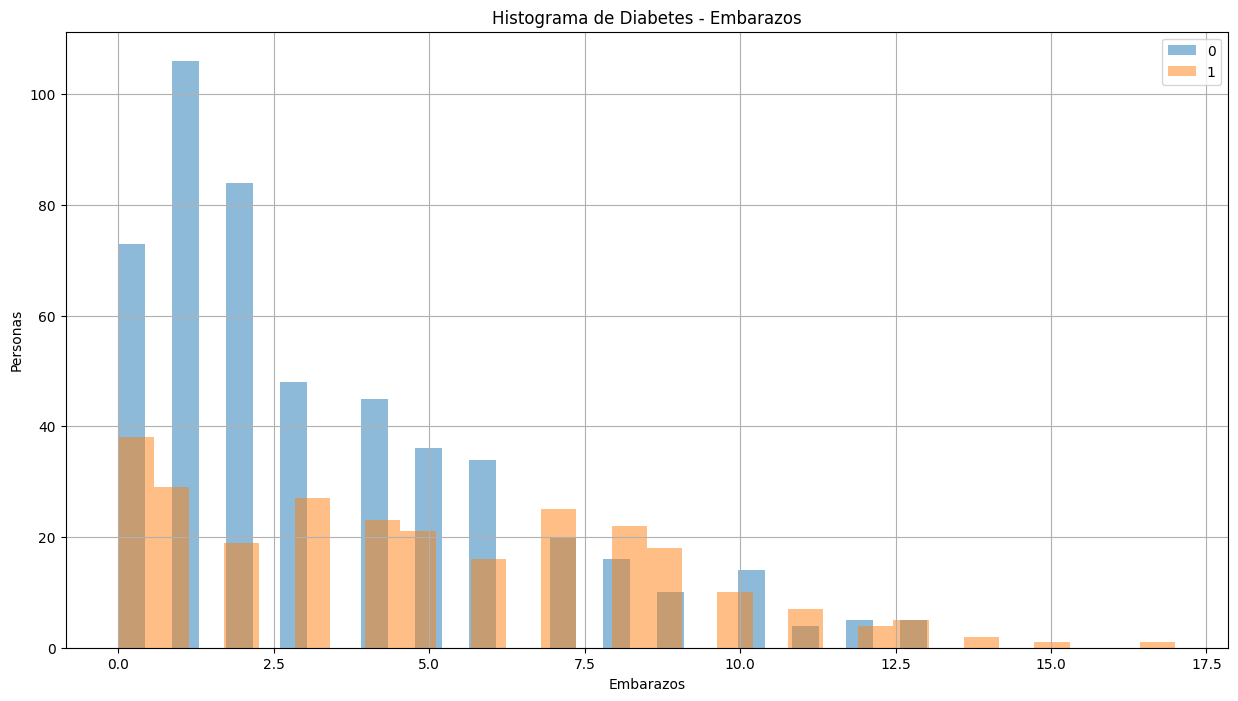

In [23]:
dataGroup = data.groupby('Outcome')
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Pregnancies'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Pregnancies'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Embarazos')
plt.xlabel('Embarazos')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

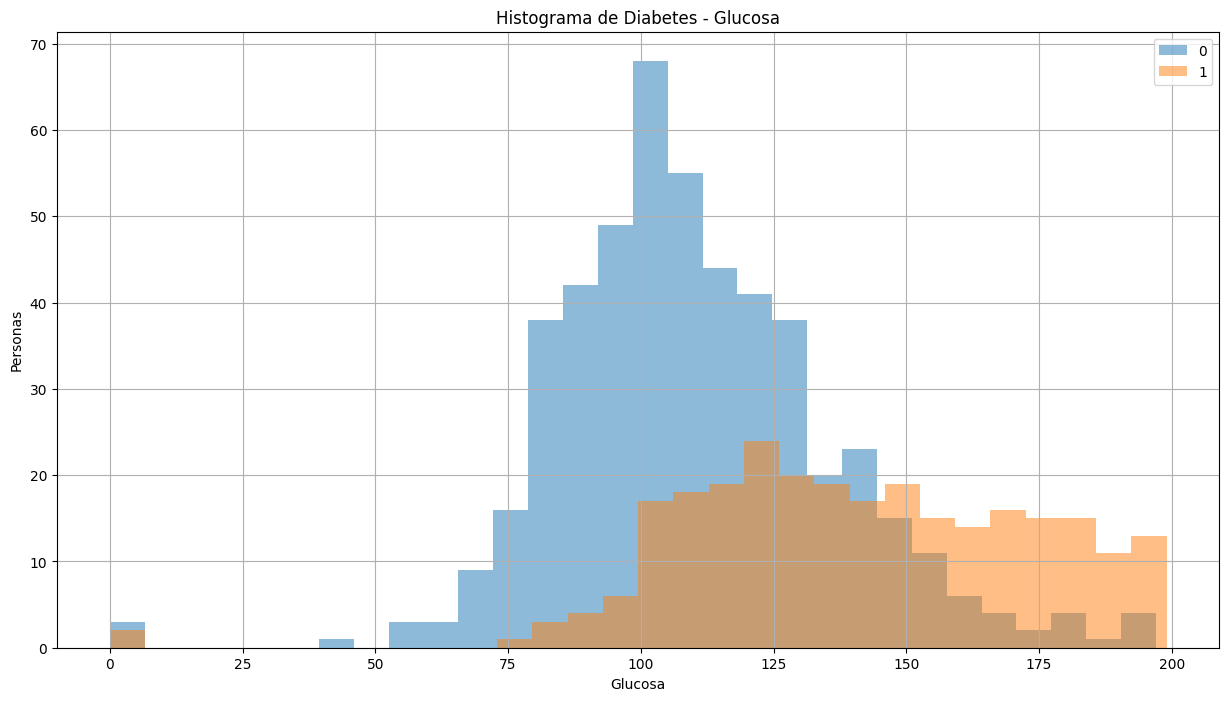

In [24]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Glucose'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Glucose'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

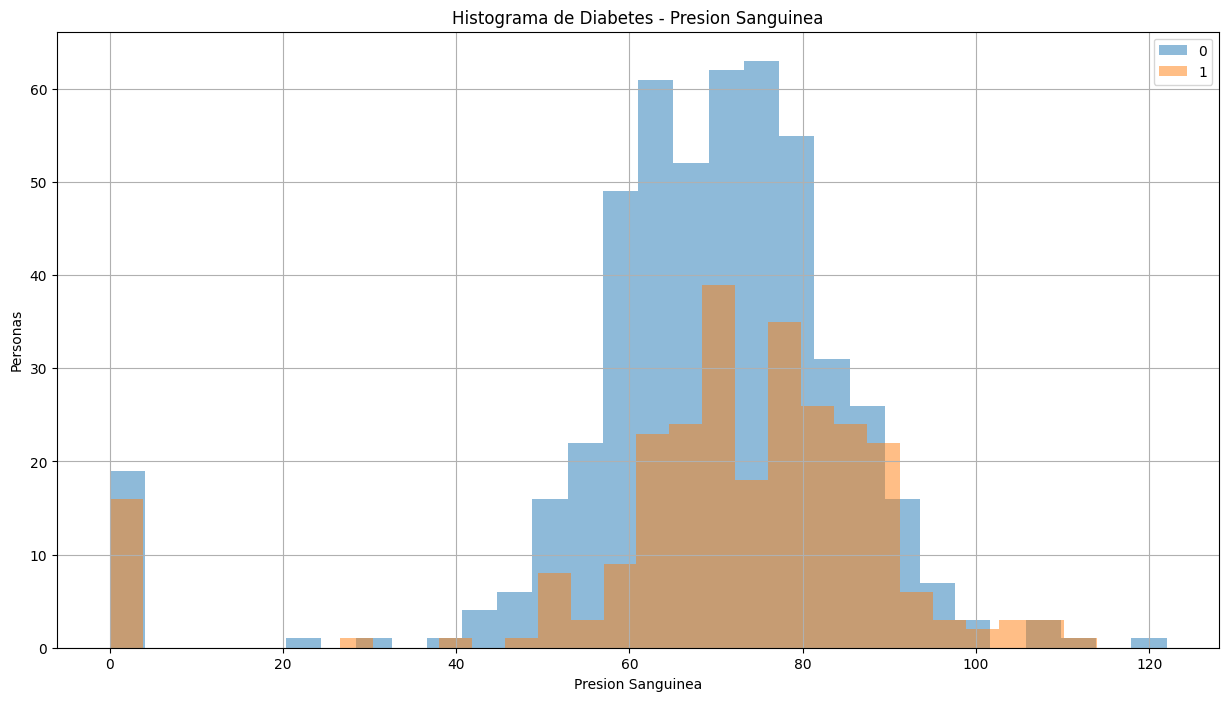

In [26]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['BloodPressure'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['BloodPressure'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Presion Sanguinea')
plt.xlabel('Presion Sanguinea')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

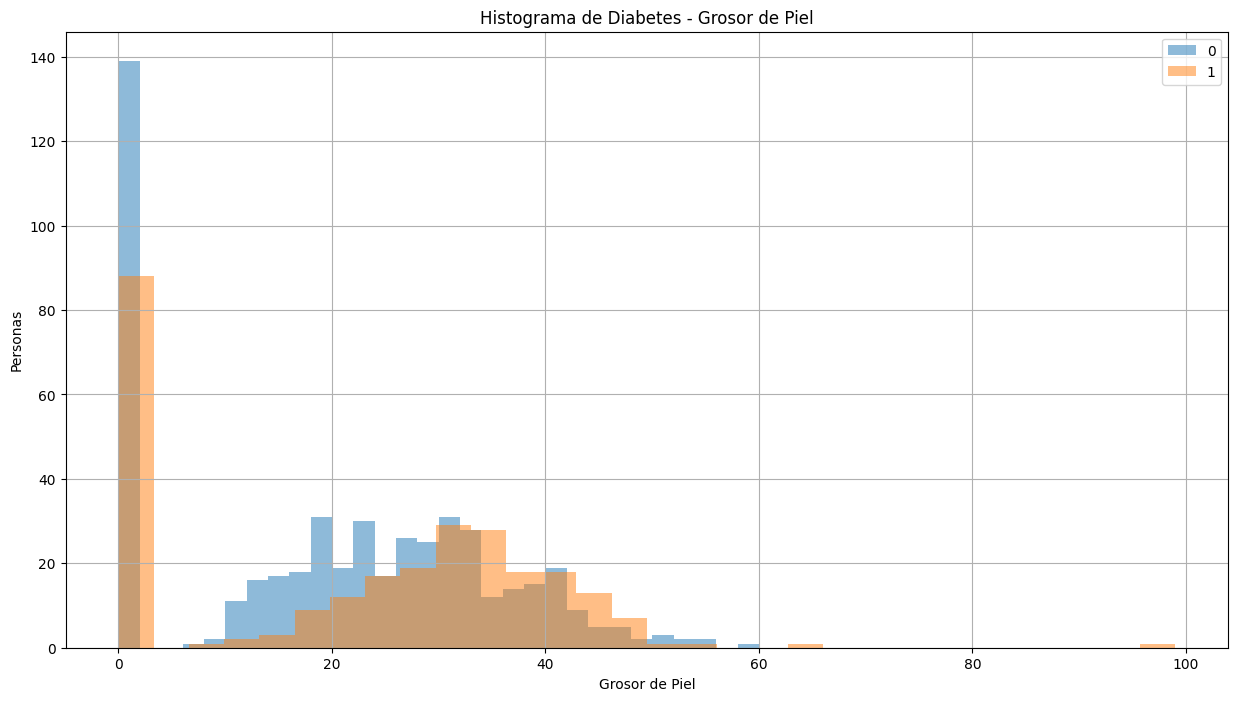

In [27]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['SkinThickness'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['SkinThickness'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Grosor de Piel')
plt.xlabel('Grosor de Piel')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

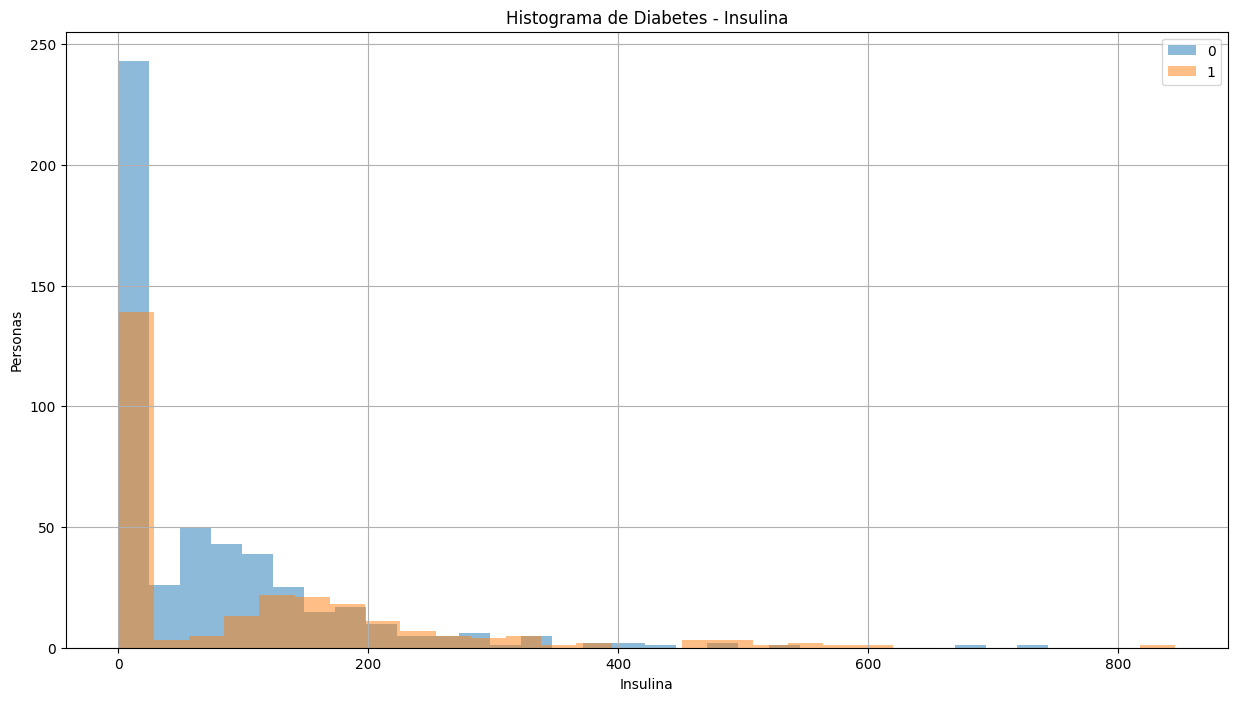

In [28]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Insulin'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Insulin'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Insulina')
plt.xlabel('Insulina')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

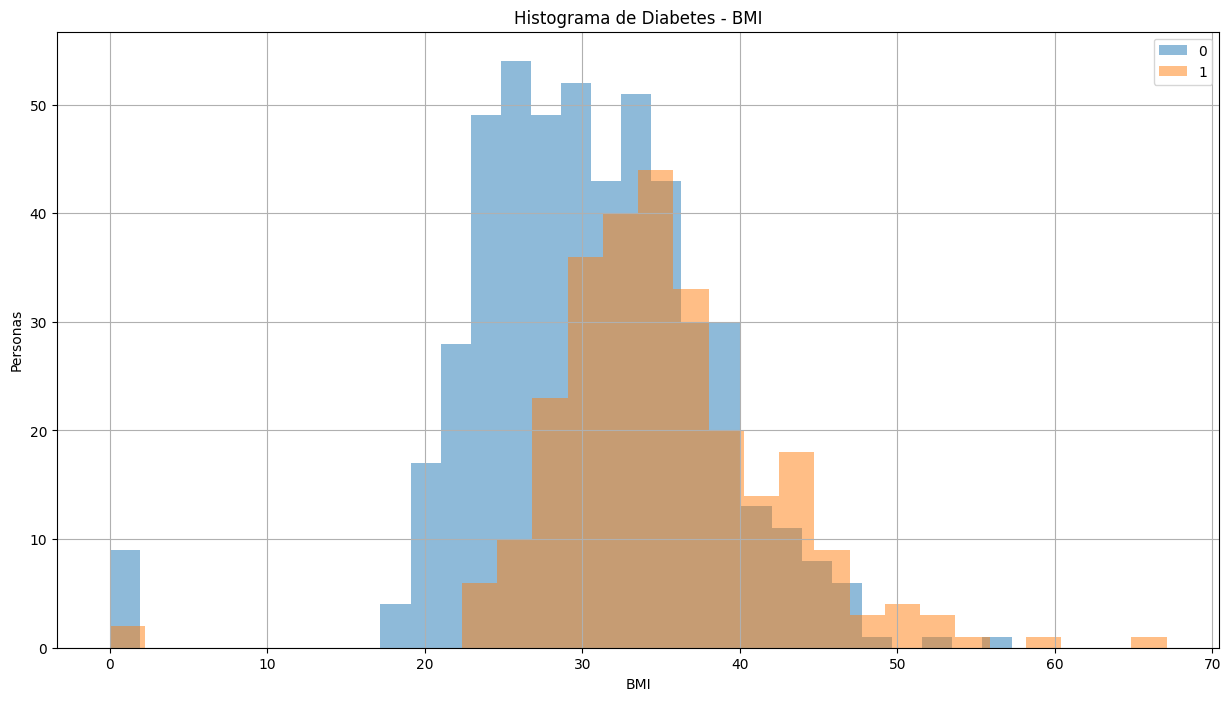

In [29]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['BMI'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['BMI'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - BMI')
plt.xlabel('BMI')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

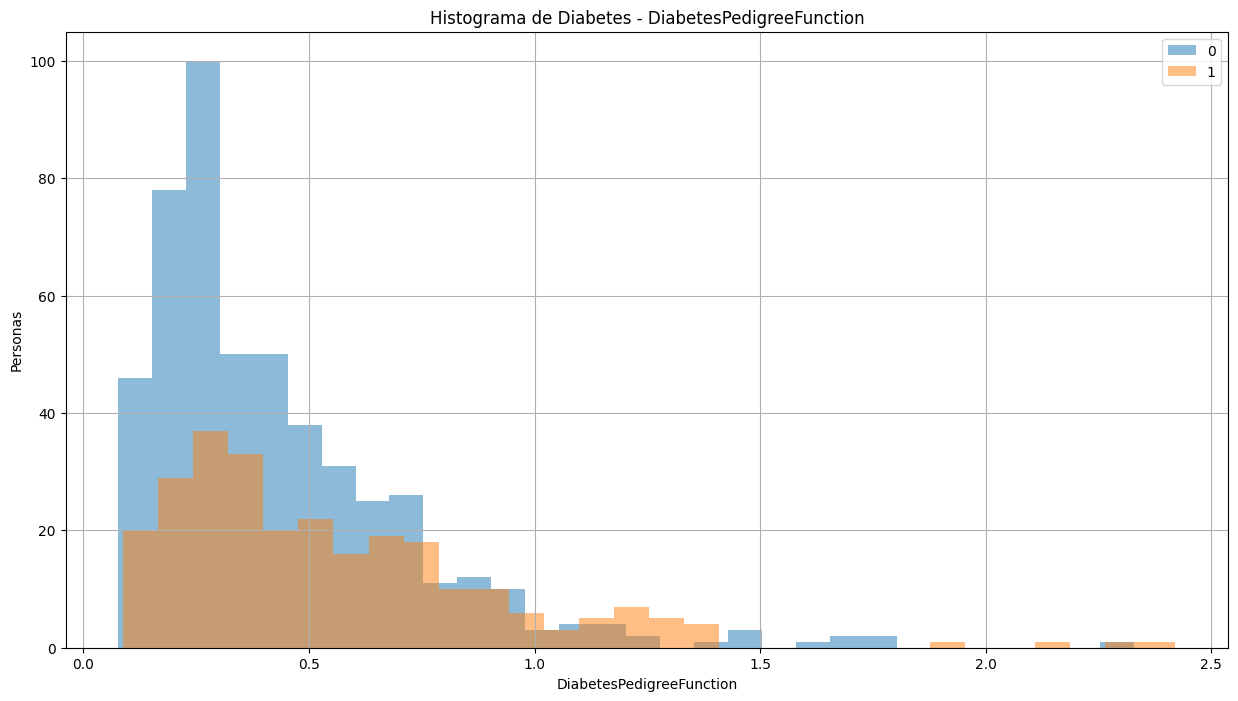

In [30]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['DiabetesPedigreeFunction'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

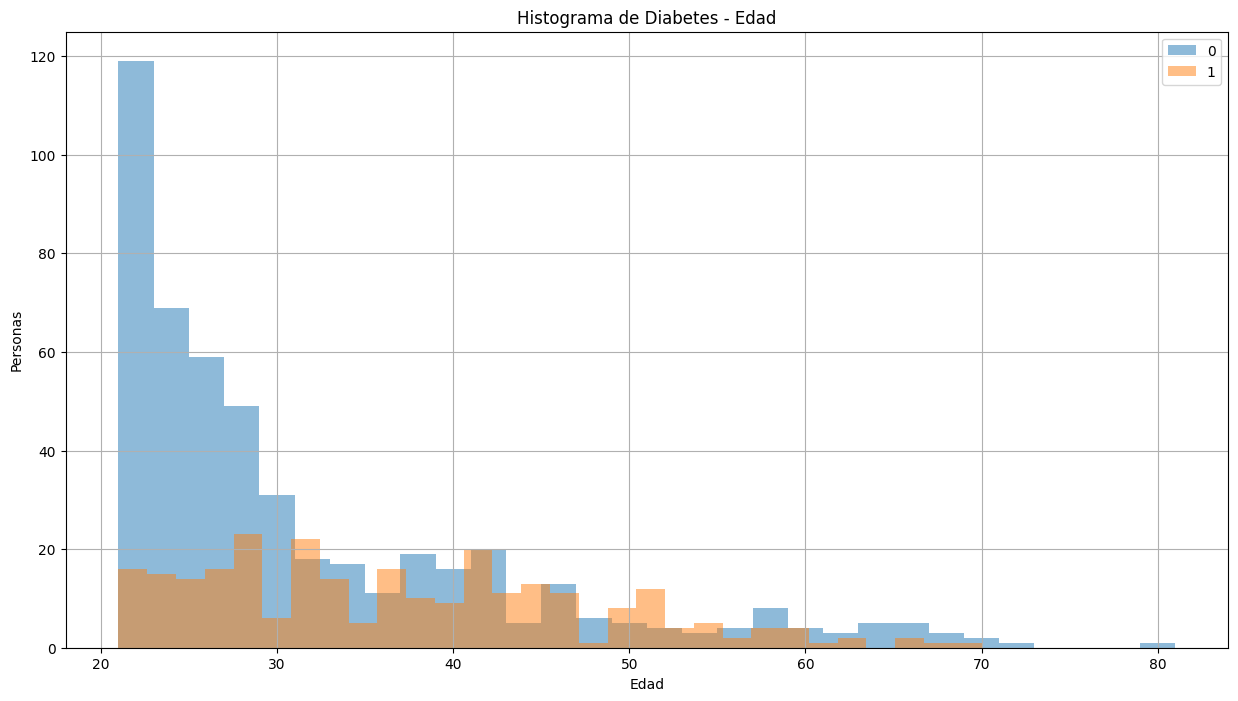

In [31]:
plt.figure(figsize=(15, 8))
plt.hist(dataGroup['Age'].get_group(0), bins=30, alpha=0.5, label='0')
plt.hist(dataGroup['Age'].get_group(1), bins=30, alpha=0.5, label='1')
plt.title('Histograma de Diabetes - Edad')
plt.xlabel('Edad')
plt.ylabel('Personas')
plt.grid(True)
plt.legend()
plt.show()

# Carga del dataset "The Spotify Hit Predictor Dataset (1960-2019)" específico del 2010 al 2019

In [9]:
data = pd.read_csv('dataset-of-10s.csv')
print("data head")
print(data.head())
print("data info")
print(data.describe())

                                 track                          artist  \
0                          Wild Things                    Alessia Cara   
1                            Surfboard                       Esquivel!   
2                         Love Someone                    Lukas Graham   
3  Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4        Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:2ZyuwVvV6Z3XJaXIFbspeE         0.741   0.626    1    -4.826   
1  spotify:track:61APOtq25SCMuK0V5w2Kgp         0.447   0.247    5   -14.661   
2  spotify:track:2JqnpexlO9dmvjUMCaLCLJ         0.550   0.415    9    -6.557   
3  spotify:track:0cjfLhk8WJ3etPTCseKXtk         0.502   0.648    0    -5.698   
4  spotify:track:1lItf5ZXJc1by9SbPeljFd         0.807   0.887    1    -3.892   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \